# Module 03

## Session 05 Data Preparation & Feature Engineering

In this chapter, we will do:
* data: adult.csv
* target: income (>50k or <=50k)
* preprocess:
    1. missing value: simple imputer with constant
    2. one hot encoding: relationship, race, gender
    3. binary encoding: workclass, martial status, occupation, native country
    4. ordinal encoding: education (already encoded)
    5. no treatment: numerical
    6. out: fnlwgt
* random state=10, data splitting 70:30, model Tree(max_depth=5, criterion=entropy)

## Library

In [24]:
# data
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# data splitting
from sklearn.model_selection import train_test_split

# modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree

# validation
from sklearn.metrics import accuracy_score

## Data

In [2]:
df_adult = pd.read_csv('./datasets/adult.csv')
df_adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA: Missing value

In [3]:
df_adult.replace('?', np.nan, inplace=True)

In [4]:
df_adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

## EDA: Categorical Variable

In [5]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
cat_var = df_adult.columns[df_adult.dtypes == object]
cat_var

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [7]:
df_adult[cat_var].describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


## Preprocessing Scheme

In [8]:
one_hot_encoding = OneHotEncoder()
one_hot_var = ['relationship', 'race', 'gender']

# binary_encoding = ce.BinaryEncoder() --> if no missing value
# pipline --> to include methods
binary_encoding = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('binary encoder', ce.BinaryEncoder())
    ]
)
binary_var = ['workclass', 'marital-status', 'occupation', 'native-country']

In [9]:
transformer = ColumnTransformer(
    [
        ('one hot', one_hot_encoding, one_hot_var),
        ('binary', binary_encoding, binary_var)
    ],
    remainder='passthrough'
)

## Data Splitting

In [10]:
X = df_adult.drop(columns=['income', 'fnlwgt', 'education'])
y = df_adult['income']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=10
)

## Apply Preprocessing Scheme

In [12]:
X_train_prep = pd.DataFrame(transformer.fit_transform(X_train))
X_test_prep = pd.DataFrame(transformer.transform(X_test))

/Users/deris/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
one_hot_var_names = transformer.transformers_[0][1].get_feature_names()
binary_var_names = transformer.transformers_[1][1]['binary encoder'].get_feature_names()

feature_names = list(one_hot_var_names) + list(binary_var_names) + ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [14]:
X_train_prep.columns = feature_names
X_test_prep.columns = feature_names

In [15]:
X_train_prep

,x0_Husband,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Amer-Indian-Eskimo,x1_Asian-Pac-Islander,x1_Black,x1_Other,...,3_2,3_3,3_4,3_5,3_6,age,education-num,capital-gain,capital-loss,hours-per-week
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,63.0,6.0,0.0,0.0,40.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,18.0,4.0,0.0,0.0,40.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,22.0,9.0,0.0,0.0,20.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,21.0,9.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,37.0,11.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,68.0,4.0,0.0,0.0,30.0
34185,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,41.0,13.0,0.0,0.0,40.0
34186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,61.0,12.0,0.0,0.0,2.0
34187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,34.0,9.0,0.0,0.0,60.0


## Model

In [16]:
model =  DecisionTreeClassifier(max_depth=5, criterion='entropy')
model.fit(X_train_prep, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Eval

In [17]:
y_pred = model.predict(X_test_prep)
accuracy_score(y_test, y_pred)

0.8411246843649764

## Model Properties

In [19]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00076917,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00076926, 0.03060493,
       0.43319168, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03532288, 0.23264562,
       0.22569583, 0.0230144 , 0.01798623])

In [20]:
df_importance = pd.DataFrame(
    {
        'importance':model.feature_importances_
    }, index=feature_names
).sort_values('importance', ascending=False)

In [23]:
df_importance

,importance
1_3,0.433192
education-num,0.232646
capital-gain,0.225696
age,0.035323
1_2,0.030605
capital-loss,0.023014
hours-per-week,0.017986
1_1,0.000769
x0_Unmarried,0.000769
x1_Asian-Pac-Islander,0.000000


<AxesSubplot:>

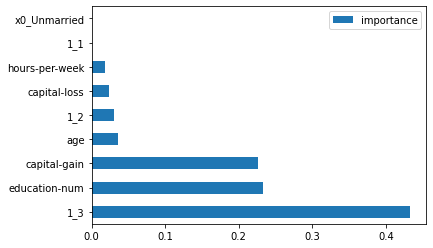

In [22]:
df_importance[:9].plot(kind='barh')

## Tree

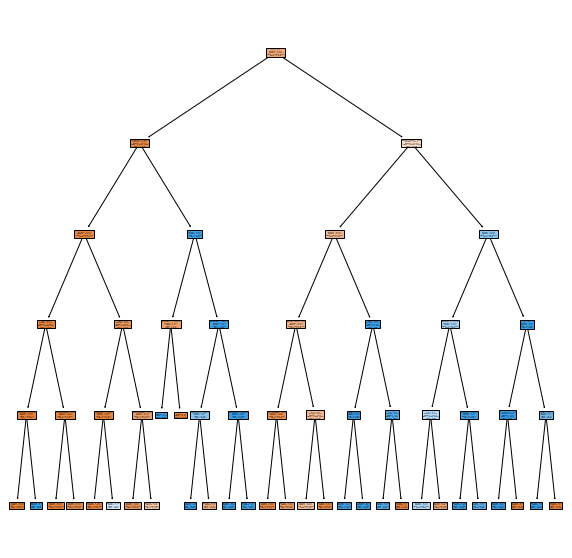

In [29]:
plt.figure(figsize=(10,10))
plot_tree(model, feature_names=feature_names, filled=True, class_names = ['<=50k', '>50k'])
plt.show()